In [15]:
import numpy as np
import matplotlib.pyplot as plt
import openturns as ot

In [134]:
coordinates = np.array([[0.0,0.0],[0.0, 0.5], [0.5, 0.5],[0.5,0.0],[1.0,0.0],[0.0,1.0],[0.5,1.],[1.0,1.0]])
observations = np.array([[1.0],[-0], [0],[0.5],[0.75],[-1.0],[0.0],[1.0]])

In [135]:
x = coordinates[:,0]
y = coordinates[:,1]
    

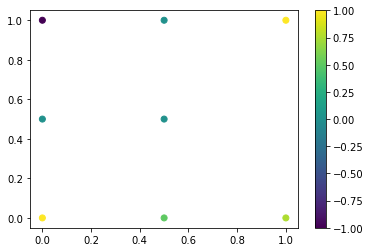

In [136]:
fig = plt.figure()
plt.scatter(x, y, c=observations, cmap='viridis')
plt.colorbar()
plt.show()

In [137]:
observations

array([[ 1.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.5 ],
       [ 0.75],
       [-1.  ],
       [ 0.  ],
       [ 1.  ]])

In [138]:
input_train = ot.Sample(coordinates)
output_train = ot.Sample(observations)

In [139]:
len(observations)

8

In [140]:
len(coordinates)

8

In [141]:
inputDimension = 2
basis = ot.ConstantBasisFactory(inputDimension).build()
covariance_kernel = ot.SquaredExponential([1.0]*inputDimension, [1.0])
algo = ot.KrigingAlgorithm(input_train, output_train,
                           covariance_kernel, basis)

In [142]:
# Fit
algo.run()
result = algo.getResult()
krigingMetamodel = result.getMetaModel()

In [143]:
# Create the 2D domain
myInterval = ot.Interval([0.0, 0.0], [1.0, 1.0])
# Define the number of interval in each direction of the box
nx = 20
ny = 10
myIndices = [nx - 1, ny - 1]
myMesher = ot.IntervalMesher(myIndices)
myMeshBox = myMesher.build(myInterval)

In [144]:
# Create the 2D domain
myInterval = ot.Interval([0.0, 0.0], [1.0, 1.0])
# Define the number of interval in each direction of the box
nx = 20
ny = 10
myIndices = [nx - 1, ny - 1]
myMesher = ot.IntervalMesher(myIndices)
myMeshBox = myMesher.build(myInterval)

In [145]:
# Predict
vertices = myMeshBox.getVertices()
predictions = krigingMetamodel(vertices)

In [146]:
# Format for plot
X = np.array(vertices[:, 0]).reshape((ny, nx))
Y = np.array(vertices[:, 1]).reshape((ny, nx))
predictions_array = np.array(predictions).reshape((ny,nx))

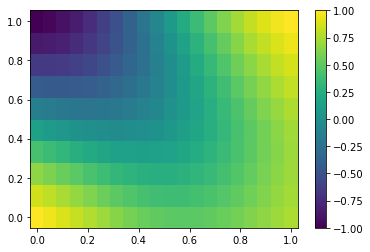

In [147]:
# Plot
import matplotlib.pyplot as plt
fig = plt.figure()
plt.pcolor(X, Y, predictions_array)
plt.colorbar()
plt.show()

In [148]:
predictions_array

array([[ 1.        ,  0.94822935,  0.88929383,  0.82576521,  0.76054218,
         0.69668068,  0.63720593,  0.58492035,  0.54222298,  0.51095483,
         0.49228313,  0.4866337 ,  0.49367678,  0.51236668,  0.54103112,
         0.57750176,  0.61927419,  0.6636836 ,  0.70808153,  0.75      ],
       [ 0.85720563,  0.80166107,  0.7403624 ,  0.67596755,  0.61142405,
         0.54979715,  0.49408079,  0.44700607,  0.41086244,  0.38734625,
         0.37744953,  0.38139798,  0.39864348,  0.4279112 ,  0.46729691,
         0.51440561,  0.56651938,  0.62078032,  0.67437351,  0.72469604],
       [ 0.66040236,  0.60453497,  0.54515869,  0.48487746,  0.42651634,
         0.3729565 ,  0.32695604,  0.29097034,  0.26698635,  0.25638467,
         0.25984122,  0.27727716,  0.30786154,  0.35006654,  0.40177067,
         0.46040117,  0.52310351,  0.58692413,  0.64899164,  0.70668289],
       [ 0.41773044,  0.36567309,  0.313155  ,  0.26257008,  0.2164337 ,
         0.17723456,  0.14727678,  0.12852423,  